### Step 1: Importing the Relevant Libraries

In [84]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

import folium
from folium.plugins import HeatMap
import plotly.express as px

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'catboost'

### Step 2: Data Inspection

In [9]:
train = pd.read_csv("train_s3TEQDk.csv")
test = pd.read_csv("test_mSzZ8RL.csv")

In [10]:
train.shape,test.shape

((245725, 11), (105312, 10))

We have 245725 rows and 11 columns in Train set whereas Test set has 105312 rows and 10 columns.

In [11]:
#ratio of null values
train.isnull().sum()/train.shape[0] *100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
dtype: float64

In [12]:
#ratio of null values
test.isnull().sum()/test.shape[0] *100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.890383
Avg_Account_Balance     0.000000
Is_Active               0.000000
dtype: float64

In [13]:
#df.isnull().sum()
missing_data=pd.DataFrame({'total_missing': train.isnull().sum(), 'perc_missing': (train.isnull().sum()/245725)*100})
missing_data

,total_missing,perc_missing
ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Region_Code,0,0.000000
Occupation,0,0.000000
Channel_Code,0,0.000000
Vintage,0,0.000000
Credit_Product,29325,11.934073
Avg_Account_Balance,0,0.000000
Is_Active,0,0.000000


Credit_Product has been contained 29325 missing values 

In [14]:
# filling null values with zero

train.fillna(0, inplace = True)

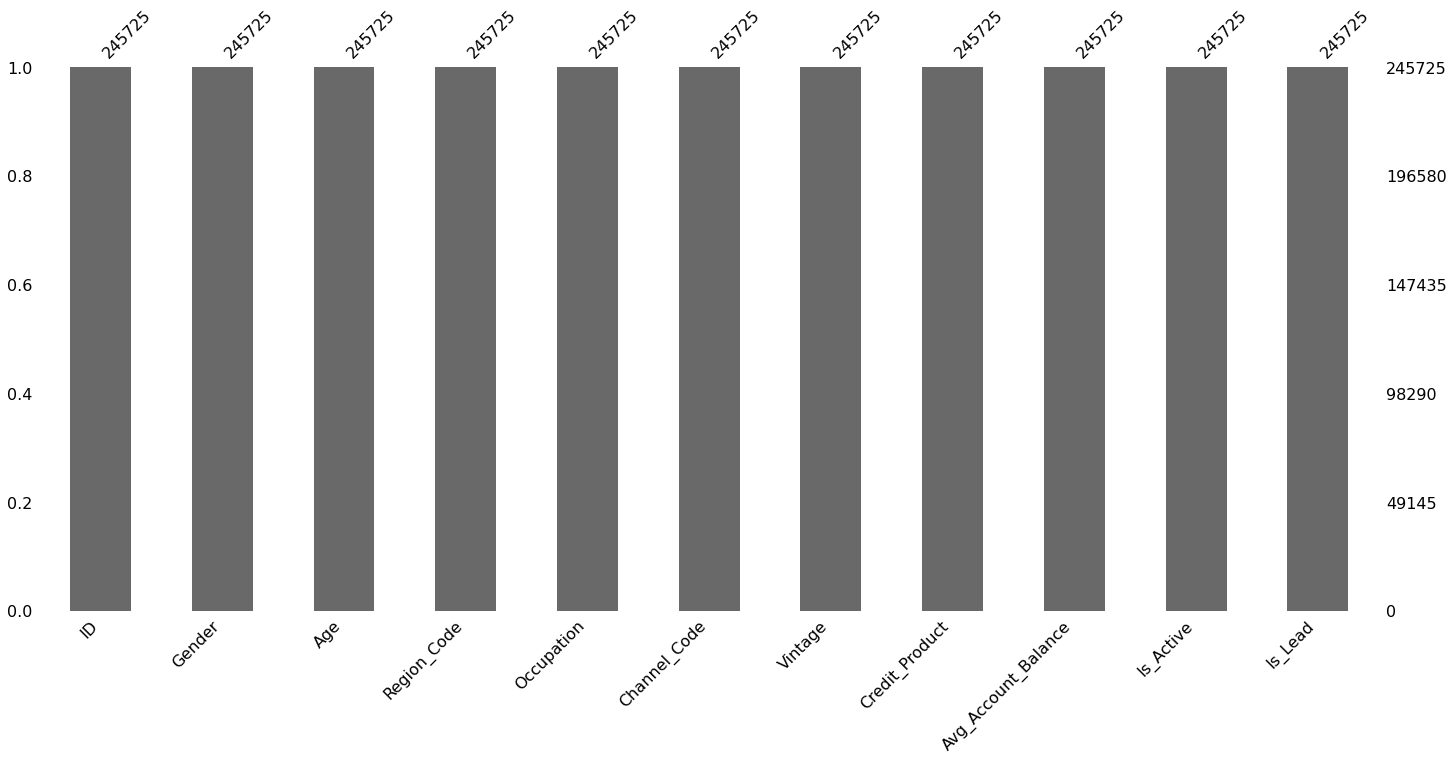

In [19]:
# visualizing null values
msno.bar(train)
plt.show()

In [5]:
#categorical features
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 7
Numerical Features in Train Set: 4


In [6]:
#categorical features
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])

#numerical features
numerical= test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Categorical Features in Test Set: 7
Numerical Features in Test Set: 3


<AxesSubplot:xlabel='Is_Lead', ylabel='Density'>

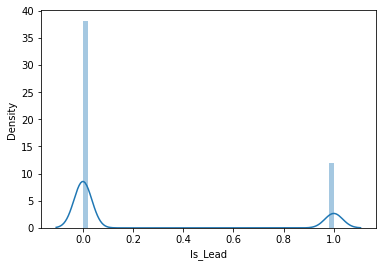

In [7]:
sns.distplot(train.Is_Lead)

In [8]:
train_df = train.loc[train.Is_Lead>0,].copy()
train_df.Is_Lead.describe() 

count    58288.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: Is_Lead, dtype: float64

In [ ]:
sns.boxplot(x='Is_Lead', y='ID', data = train_df)

### Step 3: Data Cleaning


Why missing values treatment is required? Missing data in the training data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction.

In [ ]:
train.isnull().sum()

In [ ]:
train.dtypes

In [ ]:
test.isnull().sum()

In [ ]:
for i in test:
    # if the variable is object type
    if test[i].dtypes == 'object':
        # replace with the most frequent value
        test = test.fillna(test[i].value_counts().index[0])

# Let us check if any variables have any missing values
test.isna().sum()

In [11]:
for i in train:
    # if the variable is object type
    if train[i].dtypes == 'object':
        # replace with the most frequent value
        train = train.fillna(test[i].value_counts().index[0])

# Let us check if any variables have any missing values
train.isna().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

Credit_Product has some missing values in the data

In [ ]:
train.isnull().sum()

In [ ]:
train['Credit_Product'].isnull().sum(),test['Credit_Product'].isnull().sum()

### Step 4: Exploratory Data Analysis

In [ ]:
train.columns

In [ ]:
train.head()

In [ ]:
train['Gender'].value_counts()

In [ ]:
test['Gender'].value_counts()

In [ ]:
train['Occupation'].value_counts()

In [ ]:
test['Occupation'].value_counts()

In [ ]:
train['Region_Code'].value_counts()

In [21]:
test['Region_Code'].value_counts()

RG268    15125
RG283    12881
RG254    11737
RG284     8173
RG277     5596
RG280     5529
RG270     3440
RG269     3288
RG261     3286
RG251     2678
RG257     2588
RG272     2338
RG282     2337
RG274     2208
RG281     2144
RG252     1811
RG273     1803
RG263     1615
RG279     1600
RG275     1383
RG260     1300
RG264     1241
RG256     1194
RG276     1185
RG259     1102
RG250     1048
RG255      891
RG278      824
RG258      812
RG253      810
RG262      800
RG265      668
RG271      654
RG266      631
RG267      592
Name: Region_Code, dtype: int64

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot('Gender',data=train,palette='ocean')

_More Number of Male customers are associated with banks in test and train data._

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot('Gender',data=test,palette='ocean')

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot('Occupation',data=test,palette='spring')

<AxesSubplot:xlabel='Occupation', ylabel='count'>

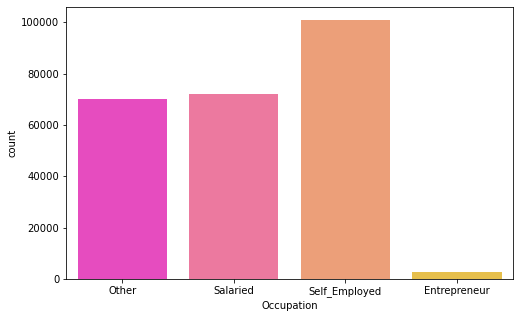

In [25]:
plt.figure(figsize=(8,5))
sns.countplot('Occupation',data=train,palette='spring')

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot('Credit_Product',data=train,palette='spring')

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot('Is_Active',data=train,palette='spring')

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot('Is_Lead',data=train,palette='spring')

Droping unwanted columns

In [56]:
train=train.drop(['Region_Code','Channel_Code'], axis = 1)

KeyError: "['Region_Code' 'Channel_Code'] not found in axis"

In [57]:
train=train.drop(['ID'], axis = 1)

_Self_employed are more number of customers_

### Step 5: Building Model

In [58]:
train.head()

,Gender,Age,Occupation,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,73,1,43,0.0,1045696,0,0
1,0,30,2,32,0.0,581988,0,0
2,0,56,3,26,0.0,1484315,1,0
3,1,34,2,19,0.0,470454,0,0
4,0,30,2,33,0.0,886787,0,0


In [59]:
# encoding categorical variables

train['Credit_Product'] = train['Credit_Product'].map({'No' : 0, 'Yes' : 1})
train['Is_Active'] = train['Is_Active'].map({'No' : 0, 'Yes' : 1})

In [60]:
train.head()

,Gender,Age,Occupation,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,73,1,43,NaN,1045696,NaN,0
1,0,30,2,32,NaN,581988,NaN,0
2,0,56,3,26,NaN,1484315,NaN,0
3,1,34,2,19,NaN,470454,NaN,0
4,0,30,2,33,NaN,886787,NaN,0


In [61]:
# Labelencoding
le = LabelEncoder()
var_mod = train.select_dtypes(include='object').columns
for i in var_mod:
    train[i] = le.fit_transform(train[i])
    
for i in var_mod:
    test[i] = le.fit_transform(test[i])

In [62]:
train.columns

Index(['Gender', 'Age', 'Occupation', 'Vintage', 'Credit_Product',
       'Avg_Account_Balance', 'Is_Active', 'Is_Lead'],
      dtype='object')

In [63]:
X = pd.concat([train], axis = 1)
y = train['Is_Lead']

In [64]:
X.shape,y.shape

((245725, 8), (245725,))

In [65]:
train.replace([np.inf, -np.inf], np.nan, inplace=True)

Logistic Regression

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [68]:
X_train.isna().sum()

Gender                      0
Age                         0
Occupation                  0
Vintage                     0
Credit_Product         172007
Avg_Account_Balance         0
Is_Active              172007
Is_Lead                     0
dtype: int64

In [71]:
y_train.isna().sum()

0

In [72]:
X_test.isna().sum()

Gender                     0
Age                        0
Occupation                 0
Vintage                    0
Credit_Product         73718
Avg_Account_Balance        0
Is_Active              73718
Is_Lead                    0
dtype: int64

In [73]:
X_test.fillna(0, inplace = True)

In [69]:
X_train.fillna(0, inplace = True)

## Logistic Regression

In [74]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.7631379039040669
Confusion Matrix : 
[[56257     0]
 [17461     0]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.76      1.00      0.87     56257
           1       0.00      0.00      0.00     17461

    accuracy                           0.76     73718
   macro avg       0.38      0.50      0.43     73718
weighted avg       0.58      0.76      0.66     73718



## KNN

In [75]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.7285466236197401
Confusion Matrix : 
[[51165  5092]
 [14919  2542]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.77      0.91      0.84     56257
           1       0.33      0.15      0.20     17461

    accuracy                           0.73     73718
   macro avg       0.55      0.53      0.52     73718
weighted avg       0.67      0.73      0.69     73718



## Decision Tree Classifier

In [76]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 1.0
Confusion Matrix : 
[[56257     0]
 [    0 17461]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56257
           1       1.00      1.00      1.00     17461

    accuracy                           1.00     73718
   macro avg       1.00      1.00      1.00     73718
weighted avg       1.00      1.00      1.00     73718



## Random Forest Classifier

In [77]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 1.0
Confusion Matrix : 
[[56257     0]
 [    0 17461]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56257
           1       1.00      1.00      1.00     17461

    accuracy                           1.00     73718
   macro avg       1.00      1.00      1.00     73718
weighted avg       1.00      1.00      1.00     73718



## Ada Boost Classifier

In [79]:
ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)

acc_ada = accuracy_score(y_test, y_pred_ada)
conf = confusion_matrix(y_test, y_pred_ada)
clf_report = classification_report(y_test, y_pred_ada)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_ada}")
print(f"Confusion Matrix : \n{conf}")

Accuracy Score of Ada Boost Classifier is : 1.0
Confusion Matrix : 
[[56257     0]
 [    0 17461]]


## Gradient Boosting Classifier

In [80]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

acc_gb = accuracy_score(y_test, y_pred_gb)
conf = confusion_matrix(y_test, y_pred_gb)
clf_report = classification_report(y_test, y_pred_gb)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_gb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 1.0
Confusion Matrix : 
[[56257     0]
 [    0 17461]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56257
           1       1.00      1.00      1.00     17461

    accuracy                           1.00     73718
   macro avg       1.00      1.00      1.00     73718
weighted avg       1.00      1.00      1.00     73718



## XgBoost Classifier

In [81]:
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

acc_xgb = accuracy_score(y_test, y_pred_xgb)
conf = confusion_matrix(y_test, y_pred_xgb)
clf_report = classification_report(y_test, y_pred_xgb)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_xgb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

[23:04:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score of Ada Boost Classifier is : 1.0
Confusion Matrix : 
[[56257     0]
 [    0 17461]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56257
           1       1.00      1.00      1.00     17461

    accuracy                           1.00     73718
   macro avg       1.00      1.00      1.00     73718
weighted avg       1.00      1.00      1.00     73718



## Models Comparison

In [86]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'XgBoost'],
    'Score' : [acc_lr, acc_knn, acc_dtc, acc_rd_clf, acc_ada, acc_gb, acc_xgb]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,Decision Tree Classifier,1.000000
3,Random Forest Classifier,1.000000
4,Ada Boost Classifier,1.000000
5,Gradient Boosting Classifier,1.000000
6,XgBoost,1.000000
0,Logistic Regression,0.763138
1,KNN,0.728547


In [89]:
submission = pd.read_csv('sample_submission_8RXa3c6.csv')
final_predictions = models
submission['Item_Outlet_Sales'] = final_predictions
#only positive predictions for the target variable
submission.to_csv('my_submission.csv', index=False)